In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                'machine-learning-databases/iris/iris.data', header=None)

In [3]:
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
import matplotlib.pyplot as plt
import numpy as np
# 1-100行目の目的変数の抽出
y = df.iloc[0:100, 4].values
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [5]:
# Iris-setosaを-1, Iris-virginicaを1に変換
y = np.where(y == 'Iris-setosa', -1, 1)
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [6]:
# 1-100行目の1,3列目の抽出
X = df.iloc[0:100, [0, 2]].values

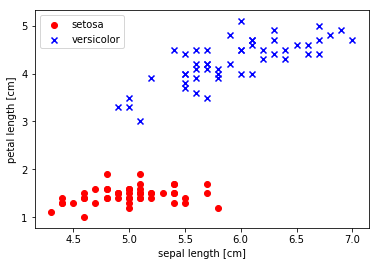

In [7]:
# setosaのプロット（赤の○）
plt.scatter(X[:50,0], X[:50,1], color='red', marker='o', label='setosa')
# versicolorのプロット（青の×）
plt.scatter(X[50:100,0], X[50:100,1], color='blue', marker='x', label='versicolor')
# 軸のラベルの設定
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
# 凡例の設定（左上に配置）
plt.legend(loc='upper left')
plt.show()

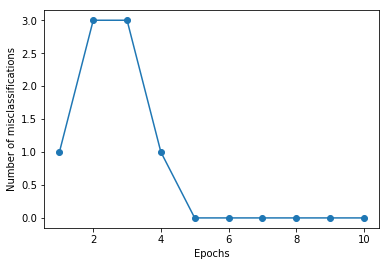

In [8]:
from perceptron import Perceptron
# パーセプトロンのオブジェクトの生成
ppn = Perceptron(eta=0.1, n_iter=10)
# トレーニングデータへのモデルの適合
ppn.fit(X,y)
# エポックと誤分類誤差の関係の折れ線グラフをプロット
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

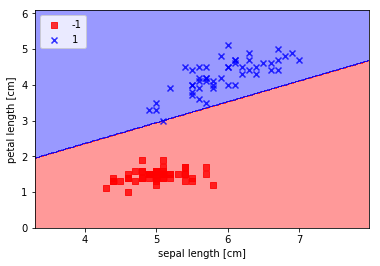

In [9]:
from plot_decision_regions import plot_decision_regions
# 決定境界のプロット
plot_decision_regions(X, y, classifier=ppn)
# 軸のラベルの設定
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
# 凡例の設定
plt.legend(loc='upper left')
# 図の表示
plt.show()

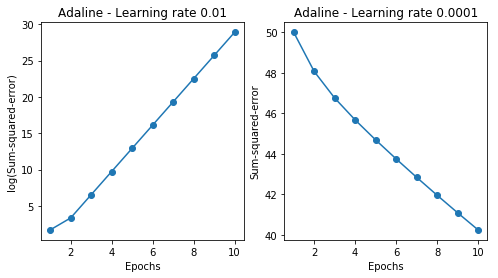

In [10]:
from adaline_GD import AdalineGD
# 描画領域を1行2列に分割
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
# 勾配降下法によるADALINEの学習(学習率 eta=0.01)
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X,y)
# エポック数とコストの関数を表す折れ線グラフのプロット（縦軸のコストは常用対数）
ax[0].plot(range(1, len(ada1.cost_)+1), np.log10(ada1.cost_), marker='o')
# 軸のラベルの設定
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
# タイトルの設定
ax[0].set_title('Adaline - Learning rate 0.01')
# 勾配降下法によるADALINEの学習（学習率 eta=0.0001）
ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X,y)
# エポック数とコストの関数を表す折れ線グラフのプロット
ax[1].plot(range(1, len(ada2.cost_)+1), ada2.cost_, marker='o')
# 軸のラベルの設定
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
# タイトルの設定
ax[1].set_title('Adaline - Learning rate 0.0001')
# 図の表示
plt.show()

In [11]:
# データのコピー
X_std = np.copy(X)
# 各列の標準化
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

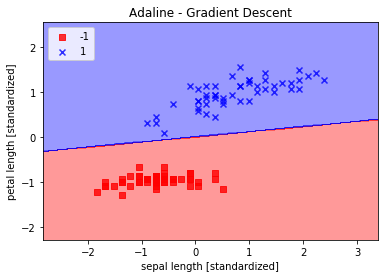

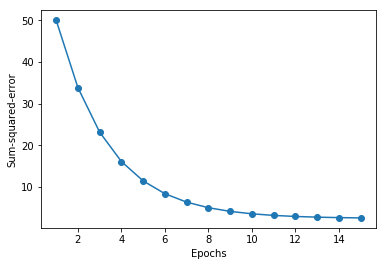

In [12]:
# 勾配降下法によるADALINEの学習(学習率 eta=0.01)
ada = AdalineGD(n_iter=15, eta=0.01).fit(X_std,y)
# 決定境界のプロット
plot_decision_regions(X_std, y, classifier=ada)
# タイトルの設定
plt.title('Adaline - Gradient Descent')
# 軸のラベルの設定
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
# 凡例の設定
plt.legend(loc='upper left')
# 図の表示
plt.show()
# エポック数とコストの関数を表す折れ線グラフのプロット
plt.plot(range(1, len(ada.cost_)+1), ada.cost_, marker='o')
# 軸のラベルの設定
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
# 図の表示
plt.show()

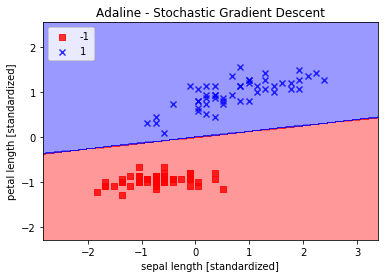

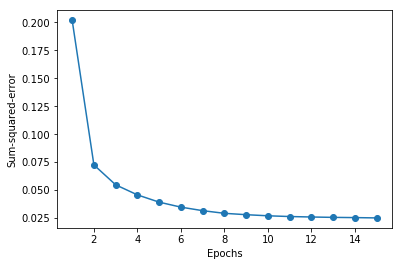

In [13]:
from adaline_SGD import AdalineSGD
# 勾配降下法によるADALINEの学習(学習率 eta=0.01)
ada = AdalineSGD(n_iter=15, eta=0.01, random_state=1).fit(X_std,y)
# 決定境界のプロット
plot_decision_regions(X_std, y, classifier=ada)
# タイトルの設定
plt.title('Adaline - Stochastic Gradient Descent')
# 軸のラベルの設定
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
# 凡例の設定
plt.legend(loc='upper left')
# 図の表示
plt.show()
# エポック数とコストの関数を表す折れ線グラフのプロット
plt.plot(range(1, len(ada.cost_)+1), ada.cost_, marker='o')
# 軸のラベルの設定
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
# 図の表示
plt.show()